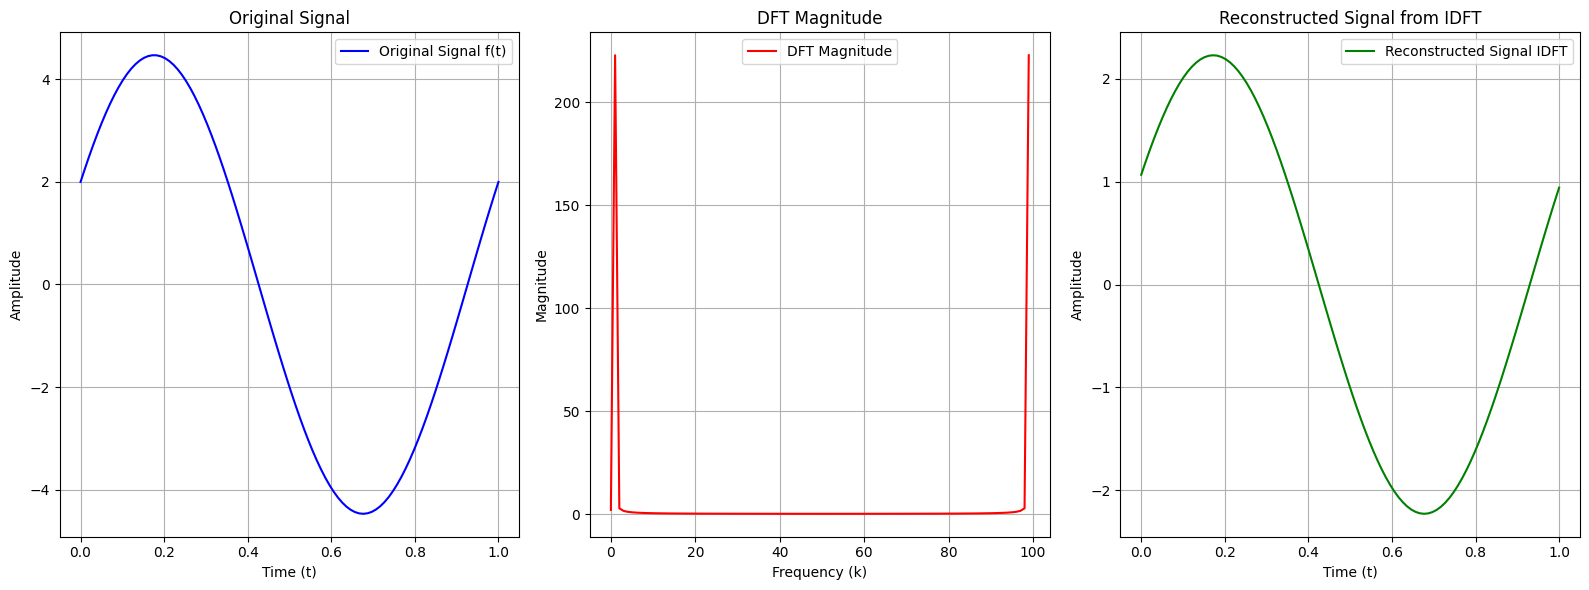

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Define functions 
def f_1(t):
    return 2 * np.sin(2*np.pi*t)

def f_2(t):
    return 2 * np.cos(2*np.pi*t)

def f_3(t):
    return 2 * np.sin(2*np.pi*t)

# Combine 3 functions together
def f(t):
    return f_1(t) + f_2(t) + f_3(t)

# Define the DFT function
def DFT(x):
  N = len(x)
  X = np.zeros(N, complex)
  for k in range(N):
    for n in range(N):
      X[k] += x[n] * np.exp(-2j*np.pi*k*n/N)
  return X

# Define the inverse DFT function
def IDFT(X):
    N = len(X)
    x = np.zeros(N, complex)
    for n in range(N):
        for k in range(N):
             x[n] += X[k] * np.exp(2j*np.pi*k*n/N)
             x[n] /= N
    return x

N = 100  # Number of samples
t = np.linspace(0, 1, 100)

# Calculate the DFT of the composite function
X = DFT(f(t))

# Calculate the inverse DFT
x = IDFT(X)

# Plot the results
plt.figure(figsize=(16, 6))

# Original Signal
plt.subplot(1, 3, 1)
plt.plot(t, f(t), label='Original Signal f(t)', color='blue')
plt.title('Original Signal')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

# DFT Magnitude
plt.subplot(1, 3, 2)
plt.plot(np.abs(X), label='DFT Magnitude', color='red')
plt.title('DFT Magnitude')
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.grid()
plt.legend()

# IDFT Signal
plt.subplot(1, 3, 3)
plt.plot(t, x.real, label='Reconstructed Signal IDFT', color='green')
plt.title('Reconstructed Signal from IDFT')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()